### Importing Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math


### Initialization of parameters

In [2]:
mu_r = 2.0
epsilon_r = 6.0
mu_0 =1.25663706212E-6 
epsilon_0 =8.8541878128E-12
imp0 = np.sqrt(mu_0/epsilon_0)
delta_z = 0.004293 #converted from cm to m
N_z = 200
n_r = math.sqrt((mu_r*epsilon_r))
z = np.zeros((N_z,1))
#initialization of device parameters
Mu_r = np.ones((1,N_z))
Epsilon_r = np.ones((1,N_z))
#print(Mu_r,Epsilon_r)
print(Mu_r.size,Epsilon_r.size)
#Adding the materials on the grid

Mu_r[:,13:83] = mu_r
Epsilon_r[:,13:83] = epsilon_r
print(Mu_r.shape,Epsilon_r.shape,z.shape)

200 200
(1, 200) (1, 200) (200, 1)


### Initial computations of relevant parameters

In [3]:
#Compute time step
c_0 =  299792458 #m/s
delta_t = (1*delta_z)/(2*c_0)
print(delta_t)

#Compute Source parameters
tau = 1/(2*1.5E9) #Width of gaussian pulse
t_0 = 4*tau     #offset in time for source
print(tau,t_0)

#Compute number of iterations
t_prop = (n_r*N_z*delta_z)/c_0
T = 12*tau + 5*t_prop
iteration = math.ceil(T/delta_t)
t = np.linspace(0,iteration*delta_t,iteration)
print(T,iteration,t.shape)

7.159953303428334e-12
3.333333333333333e-10 1.3333333333333333e-09
5.360561160543398e-08 7487 (7487,)


### Defining source excitation

In [4]:
def gaussian_source(t,t_0,tau,delta_t,delta_z,c_0):
    #Set source permittivity and permeability
    mu_src =1 #these parameters should be the material permittivity/permeability at the grid position of the source injection
    epsilon_src = 1
    n_src = np.sqrt(epsilon_src*mu_src)
    delta = (n_src*delta_z/2*c_0)+(delta_t/2)
    A = -np.sqrt(epsilon_src/mu_src)
    x_E = (t - t_0)/tau
    x_H = (t-t_0 + delta)/tau

    Esrc = np.exp(-np.power(x_E,2))
    Hsrc = A*np.exp(-np.power(x_H,2))
    return Esrc,Hsrc

### Source excitation initialization

(200, 1) (7487,) (7487,)
0.9999822561812666 0.0 -0.0 -0.0


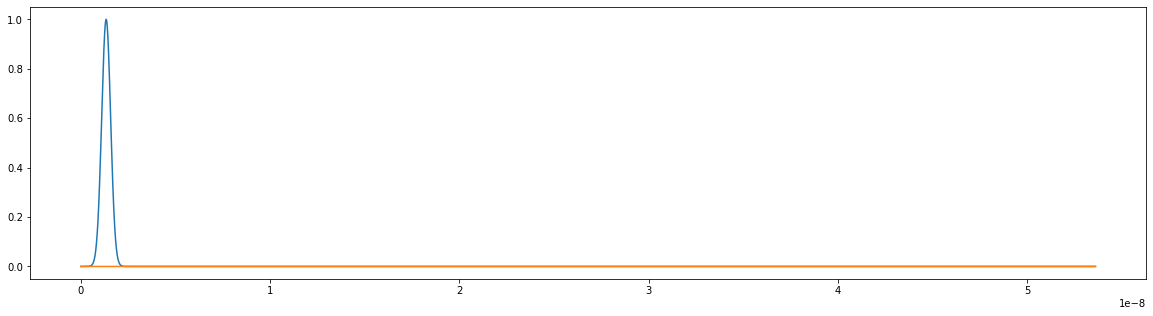

In [5]:
Esrc,Hsrc = gaussian_source(t,t_0,tau,delta_t,delta_z,c_0)
print(z.shape,Esrc.shape,Hsrc.shape)
plt.figure(figsize=[20,5])
plt.plot(t,Esrc)
plt.plot(t,Hsrc)
injection_point = 100
print(max(Esrc),min(Esrc),max(Hsrc),min(Hsrc))

### Main FDTD Loop (Basic Algorithm)

In this part, there is no excitation so n

In [ ]:
#FDTD Loop
#Creating Field values
E = np.zeros((1,N_z))
H_norm = np.zeros((1,N_z))

#Update coefficient values
m_E = c_0*delta_t/1
m_H = c_0*delta_t/1
E.shape,H_norm.shape
plt.figure(1)
#Update Equations (Looping in time)
for i in range(iteration):
    #Looping in space
    for j in range(N_z-1):
        H_norm[:,j] = H_norm[:,j] + m_H*((E[:,j+1] - E[:,j])/delta_z)
    #Boundary condition
    H_norm[:,N_z-1] = H_norm[:,N_z-1] + m_H*(-E[:,N_z-1]/delta_z)
    
    #Boundary condition
    E[:,0] = E[:,0] + m_E*((H_norm[:,0]-0)/delta_z)
    #looping in space (Electric Field)
    for j in range(1,N_z):
        E[:,j] = E[:,j] + m_E*((H_norm[:,j]-H_norm[:,j-1])/delta_z)
    
    
    
    plt.plot(E.T)#Plot E-Field
    plt.plot(H_norm.T)#Plot H-Field
    plt.ylabel('Value')
    plt.xlabel('z (Space)')
    plt.title(f'FDTD 1-D Iteration step: {i}/{iteration}')
    plt.show()
    #lineE.set_xdata(z)
    #lineE[0].set_ydata(E[i].T)
    #lineH.set_xdata(z)
    ##lineH[0].set_ydata(H_norm[i].T)
    #plt.pause(1)
    #fig.show()
    
print(E.shape,H_norm.shape)
        

#### FDTD Loop (Algorithm with Soft source) with Dirichlet Boundary Condition

In [ ]:

#FDTD Loop
#Creating Field values
E = np.zeros((1,N_z))
H_norm = np.zeros((1,N_z))
#Update coefficient values
m_E = c_0*delta_t/1
m_H = c_0*delta_t/1
E.shape,H_norm.shape

E_plot = np.zeros([iteration,N_z])
H_norm_plot = np.zeros([iteration,N_z])
print(E_plot.shape, H_norm_plot.shape)


#Update Equations (Looping in time)
for i in range(iteration):
    #Looping in space
    for j in range(N_z-1):
        H_norm[:,j] = H_norm[:,j] + m_H*((E[:,j+1] - E[:,j])/delta_z)
        if j == injection_point: #Injecting the source
            H_norm[:,j] = H_norm[:,j] + Esrc[i]
    #Boundary condition
    H_norm[:,N_z-1] = H_norm[:,N_z-1] + m_H*(-E[:,N_z-1]/delta_z)
    
    #Boundary condition
    E[:,0] = E[:,j] + m_E*(H_norm[:,0]/delta_z)
    #looping in space (Electric Field)
    for j in range(1,N_z):
        E[:,j] = E[:,j] + m_E*((H_norm[:,j] - H_norm[:,j-1])/delta_z)
        if j == injection_point: #Injecting the source
            E[:,j] = E[:,j] + Hsrc[i]
    
    E_plot[i,:] = E
    H_norm_plot[i,:] = H_norm
    print("=============================================================")
    print(f"Successfully computed field values! Iteration {i}/{iteration}....")

#### FDTD Hard source with Dirichlet Boundary Condition

In [6]:

#FDTD Loop
#Creating Field values
E = np.zeros((1,N_z))
H_norm = np.zeros((1,N_z))
#Update coefficient values
m_E = c_0*delta_t/1
m_H = c_0*delta_t/1
E.shape,H_norm.shape

E_plot = np.zeros([iteration,N_z])
H_norm_plot = np.zeros([iteration,N_z])
print(E_plot.shape, H_norm_plot.shape)


#Update Equations (Looping in time)
for i in range(iteration):
    #Looping in space
    for j in range(N_z-1):
        H_norm[:,j] = H_norm[:,j] + m_H*((E[:,j+1] - E[:,j])/delta_z)
        if j == injection_point - 1: #Injecting the source
            H_norm[:,j] =  Esrc[i]
    #Boundary condition
    H_norm[:,N_z-1] = H_norm[:,N_z-1] + m_H*(-E[:,N_z-1]/delta_z)
    
    #Boundary condition
    E[:,0] = E[:,0] + m_E*(H_norm[:,0]/delta_z)
    #looping in space (Electric Field)
    for j in range(1,N_z):
        E[:,j] = E[:,j] + m_E*((H_norm[:,j] - H_norm[:,j-1])/delta_z)
        if j == injection_point: #Injecting the source
            E[:,j] =  Hsrc[i]
    
    E_plot[i,:] = E
    H_norm_plot[i,:] = H_norm
    print("=============================================================")
    print(f"Successfully computed field values! Iteration {i}/{iteration}....")

(7487, 200) (7487, 200)
Successfully computed field values! Iteration 0/7487....
Successfully computed field values! Iteration 1/7487....
Successfully computed field values! Iteration 2/7487....
Successfully computed field values! Iteration 3/7487....
Successfully computed field values! Iteration 4/7487....
Successfully computed field values! Iteration 5/7487....
Successfully computed field values! Iteration 6/7487....
Successfully computed field values! Iteration 7/7487....
Successfully computed field values! Iteration 8/7487....
Successfully computed field values! Iteration 9/7487....
Successfully computed field values! Iteration 10/7487....
Successfully computed field values! Iteration 11/7487....
Successfully computed field values! Iteration 12/7487....
Successfully computed field values! Iteration 13/7487....
Successfully computed field values! Iteration 14/7487....
Successfully computed field values! Iteration 15/7487....
Successfully computed field values! Iteration 16/7487....


Successfully computed field values! Iteration 115/7487....
Successfully computed field values! Iteration 116/7487....
Successfully computed field values! Iteration 117/7487....
Successfully computed field values! Iteration 118/7487....
Successfully computed field values! Iteration 119/7487....
Successfully computed field values! Iteration 120/7487....
Successfully computed field values! Iteration 121/7487....
Successfully computed field values! Iteration 122/7487....
Successfully computed field values! Iteration 123/7487....
Successfully computed field values! Iteration 124/7487....
Successfully computed field values! Iteration 125/7487....
Successfully computed field values! Iteration 126/7487....
Successfully computed field values! Iteration 127/7487....
Successfully computed field values! Iteration 128/7487....
Successfully computed field values! Iteration 129/7487....
Successfully computed field values! Iteration 130/7487....
Successfully computed field values! Iteration 131/7487..

Successfully computed field values! Iteration 232/7487....
Successfully computed field values! Iteration 233/7487....
Successfully computed field values! Iteration 234/7487....
Successfully computed field values! Iteration 235/7487....
Successfully computed field values! Iteration 236/7487....
Successfully computed field values! Iteration 237/7487....
Successfully computed field values! Iteration 238/7487....
Successfully computed field values! Iteration 239/7487....
Successfully computed field values! Iteration 240/7487....
Successfully computed field values! Iteration 241/7487....
Successfully computed field values! Iteration 242/7487....
Successfully computed field values! Iteration 243/7487....
Successfully computed field values! Iteration 244/7487....
Successfully computed field values! Iteration 245/7487....
Successfully computed field values! Iteration 246/7487....
Successfully computed field values! Iteration 247/7487....
Successfully computed field values! Iteration 248/7487..

Successfully computed field values! Iteration 354/7487....
Successfully computed field values! Iteration 355/7487....
Successfully computed field values! Iteration 356/7487....
Successfully computed field values! Iteration 357/7487....
Successfully computed field values! Iteration 358/7487....
Successfully computed field values! Iteration 359/7487....
Successfully computed field values! Iteration 360/7487....
Successfully computed field values! Iteration 361/7487....
Successfully computed field values! Iteration 362/7487....
Successfully computed field values! Iteration 363/7487....
Successfully computed field values! Iteration 364/7487....
Successfully computed field values! Iteration 365/7487....
Successfully computed field values! Iteration 366/7487....
Successfully computed field values! Iteration 367/7487....
Successfully computed field values! Iteration 368/7487....
Successfully computed field values! Iteration 369/7487....
Successfully computed field values! Iteration 370/7487..

Successfully computed field values! Iteration 468/7487....
Successfully computed field values! Iteration 469/7487....
Successfully computed field values! Iteration 470/7487....
Successfully computed field values! Iteration 471/7487....
Successfully computed field values! Iteration 472/7487....
Successfully computed field values! Iteration 473/7487....
Successfully computed field values! Iteration 474/7487....
Successfully computed field values! Iteration 475/7487....
Successfully computed field values! Iteration 476/7487....
Successfully computed field values! Iteration 477/7487....
Successfully computed field values! Iteration 478/7487....
Successfully computed field values! Iteration 479/7487....
Successfully computed field values! Iteration 480/7487....
Successfully computed field values! Iteration 481/7487....
Successfully computed field values! Iteration 482/7487....
Successfully computed field values! Iteration 483/7487....
Successfully computed field values! Iteration 484/7487..

Successfully computed field values! Iteration 577/7487....
Successfully computed field values! Iteration 578/7487....
Successfully computed field values! Iteration 579/7487....
Successfully computed field values! Iteration 580/7487....
Successfully computed field values! Iteration 581/7487....
Successfully computed field values! Iteration 582/7487....
Successfully computed field values! Iteration 583/7487....
Successfully computed field values! Iteration 584/7487....
Successfully computed field values! Iteration 585/7487....
Successfully computed field values! Iteration 586/7487....
Successfully computed field values! Iteration 587/7487....
Successfully computed field values! Iteration 588/7487....
Successfully computed field values! Iteration 589/7487....
Successfully computed field values! Iteration 590/7487....
Successfully computed field values! Iteration 591/7487....
Successfully computed field values! Iteration 592/7487....
Successfully computed field values! Iteration 593/7487..

Successfully computed field values! Iteration 694/7487....
Successfully computed field values! Iteration 695/7487....
Successfully computed field values! Iteration 696/7487....
Successfully computed field values! Iteration 697/7487....
Successfully computed field values! Iteration 698/7487....
Successfully computed field values! Iteration 699/7487....
Successfully computed field values! Iteration 700/7487....
Successfully computed field values! Iteration 701/7487....
Successfully computed field values! Iteration 702/7487....
Successfully computed field values! Iteration 703/7487....
Successfully computed field values! Iteration 704/7487....
Successfully computed field values! Iteration 705/7487....
Successfully computed field values! Iteration 706/7487....
Successfully computed field values! Iteration 707/7487....
Successfully computed field values! Iteration 708/7487....
Successfully computed field values! Iteration 709/7487....
Successfully computed field values! Iteration 710/7487..

Successfully computed field values! Iteration 813/7487....
Successfully computed field values! Iteration 814/7487....
Successfully computed field values! Iteration 815/7487....
Successfully computed field values! Iteration 816/7487....
Successfully computed field values! Iteration 817/7487....
Successfully computed field values! Iteration 818/7487....
Successfully computed field values! Iteration 819/7487....
Successfully computed field values! Iteration 820/7487....
Successfully computed field values! Iteration 821/7487....
Successfully computed field values! Iteration 822/7487....
Successfully computed field values! Iteration 823/7487....
Successfully computed field values! Iteration 824/7487....
Successfully computed field values! Iteration 825/7487....
Successfully computed field values! Iteration 826/7487....
Successfully computed field values! Iteration 827/7487....
Successfully computed field values! Iteration 828/7487....
Successfully computed field values! Iteration 829/7487..

Successfully computed field values! Iteration 934/7487....
Successfully computed field values! Iteration 935/7487....
Successfully computed field values! Iteration 936/7487....
Successfully computed field values! Iteration 937/7487....
Successfully computed field values! Iteration 938/7487....
Successfully computed field values! Iteration 939/7487....
Successfully computed field values! Iteration 940/7487....
Successfully computed field values! Iteration 941/7487....
Successfully computed field values! Iteration 942/7487....
Successfully computed field values! Iteration 943/7487....
Successfully computed field values! Iteration 944/7487....
Successfully computed field values! Iteration 945/7487....
Successfully computed field values! Iteration 946/7487....
Successfully computed field values! Iteration 947/7487....
Successfully computed field values! Iteration 948/7487....
Successfully computed field values! Iteration 949/7487....
Successfully computed field values! Iteration 950/7487..

Successfully computed field values! Iteration 1062/7487....
Successfully computed field values! Iteration 1063/7487....
Successfully computed field values! Iteration 1064/7487....
Successfully computed field values! Iteration 1065/7487....
Successfully computed field values! Iteration 1066/7487....
Successfully computed field values! Iteration 1067/7487....
Successfully computed field values! Iteration 1068/7487....
Successfully computed field values! Iteration 1069/7487....
Successfully computed field values! Iteration 1070/7487....
Successfully computed field values! Iteration 1071/7487....
Successfully computed field values! Iteration 1072/7487....
Successfully computed field values! Iteration 1073/7487....
Successfully computed field values! Iteration 1074/7487....
Successfully computed field values! Iteration 1075/7487....
Successfully computed field values! Iteration 1076/7487....
Successfully computed field values! Iteration 1077/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 1184/7487....
Successfully computed field values! Iteration 1185/7487....
Successfully computed field values! Iteration 1186/7487....
Successfully computed field values! Iteration 1187/7487....
Successfully computed field values! Iteration 1188/7487....
Successfully computed field values! Iteration 1189/7487....
Successfully computed field values! Iteration 1190/7487....
Successfully computed field values! Iteration 1191/7487....
Successfully computed field values! Iteration 1192/7487....
Successfully computed field values! Iteration 1193/7487....
Successfully computed field values! Iteration 1194/7487....
Successfully computed field values! Iteration 1195/7487....
Successfully computed field values! Iteration 1196/7487....
Successfully computed field values! Iteration 1197/7487....
Successfully computed field values! Iteration 1198/7487....
Successfully computed field values! Iteration 1199/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 1301/7487....
Successfully computed field values! Iteration 1302/7487....
Successfully computed field values! Iteration 1303/7487....
Successfully computed field values! Iteration 1304/7487....
Successfully computed field values! Iteration 1305/7487....
Successfully computed field values! Iteration 1306/7487....
Successfully computed field values! Iteration 1307/7487....
Successfully computed field values! Iteration 1308/7487....
Successfully computed field values! Iteration 1309/7487....
Successfully computed field values! Iteration 1310/7487....
Successfully computed field values! Iteration 1311/7487....
Successfully computed field values! Iteration 1312/7487....
Successfully computed field values! Iteration 1313/7487....
Successfully computed field values! Iteration 1314/7487....
Successfully computed field values! Iteration 1315/7487....
Successfully computed field values! Iteration 1316/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 1420/7487....
Successfully computed field values! Iteration 1421/7487....
Successfully computed field values! Iteration 1422/7487....
Successfully computed field values! Iteration 1423/7487....
Successfully computed field values! Iteration 1424/7487....
Successfully computed field values! Iteration 1425/7487....
Successfully computed field values! Iteration 1426/7487....
Successfully computed field values! Iteration 1427/7487....
Successfully computed field values! Iteration 1428/7487....
Successfully computed field values! Iteration 1429/7487....
Successfully computed field values! Iteration 1430/7487....
Successfully computed field values! Iteration 1431/7487....
Successfully computed field values! Iteration 1432/7487....
Successfully computed field values! Iteration 1433/7487....
Successfully computed field values! Iteration 1434/7487....
Successfully computed field values! Iteration 1435/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 1544/7487....
Successfully computed field values! Iteration 1545/7487....
Successfully computed field values! Iteration 1546/7487....
Successfully computed field values! Iteration 1547/7487....
Successfully computed field values! Iteration 1548/7487....
Successfully computed field values! Iteration 1549/7487....
Successfully computed field values! Iteration 1550/7487....
Successfully computed field values! Iteration 1551/7487....
Successfully computed field values! Iteration 1552/7487....
Successfully computed field values! Iteration 1553/7487....
Successfully computed field values! Iteration 1554/7487....
Successfully computed field values! Iteration 1555/7487....
Successfully computed field values! Iteration 1556/7487....
Successfully computed field values! Iteration 1557/7487....
Successfully computed field values! Iteration 1558/7487....
Successfully computed field values! Iteration 1559/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 1664/7487....
Successfully computed field values! Iteration 1665/7487....
Successfully computed field values! Iteration 1666/7487....
Successfully computed field values! Iteration 1667/7487....
Successfully computed field values! Iteration 1668/7487....
Successfully computed field values! Iteration 1669/7487....
Successfully computed field values! Iteration 1670/7487....
Successfully computed field values! Iteration 1671/7487....
Successfully computed field values! Iteration 1672/7487....
Successfully computed field values! Iteration 1673/7487....
Successfully computed field values! Iteration 1674/7487....
Successfully computed field values! Iteration 1675/7487....
Successfully computed field values! Iteration 1676/7487....
Successfully computed field values! Iteration 1677/7487....
Successfully computed field values! Iteration 1678/7487....
Successfully computed field values! Iteration 1679/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 1769/7487....
Successfully computed field values! Iteration 1770/7487....
Successfully computed field values! Iteration 1771/7487....
Successfully computed field values! Iteration 1772/7487....
Successfully computed field values! Iteration 1773/7487....
Successfully computed field values! Iteration 1774/7487....
Successfully computed field values! Iteration 1775/7487....
Successfully computed field values! Iteration 1776/7487....
Successfully computed field values! Iteration 1777/7487....
Successfully computed field values! Iteration 1778/7487....
Successfully computed field values! Iteration 1779/7487....
Successfully computed field values! Iteration 1780/7487....
Successfully computed field values! Iteration 1781/7487....
Successfully computed field values! Iteration 1782/7487....
Successfully computed field values! Iteration 1783/7487....
Successfully computed field values! Iteration 1784/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 1883/7487....
Successfully computed field values! Iteration 1884/7487....
Successfully computed field values! Iteration 1885/7487....
Successfully computed field values! Iteration 1886/7487....
Successfully computed field values! Iteration 1887/7487....
Successfully computed field values! Iteration 1888/7487....
Successfully computed field values! Iteration 1889/7487....
Successfully computed field values! Iteration 1890/7487....
Successfully computed field values! Iteration 1891/7487....
Successfully computed field values! Iteration 1892/7487....
Successfully computed field values! Iteration 1893/7487....
Successfully computed field values! Iteration 1894/7487....
Successfully computed field values! Iteration 1895/7487....
Successfully computed field values! Iteration 1896/7487....
Successfully computed field values! Iteration 1897/7487....
Successfully computed field values! Iteration 1898/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 2002/7487....
Successfully computed field values! Iteration 2003/7487....
Successfully computed field values! Iteration 2004/7487....
Successfully computed field values! Iteration 2005/7487....
Successfully computed field values! Iteration 2006/7487....
Successfully computed field values! Iteration 2007/7487....
Successfully computed field values! Iteration 2008/7487....
Successfully computed field values! Iteration 2009/7487....
Successfully computed field values! Iteration 2010/7487....
Successfully computed field values! Iteration 2011/7487....
Successfully computed field values! Iteration 2012/7487....
Successfully computed field values! Iteration 2013/7487....
Successfully computed field values! Iteration 2014/7487....
Successfully computed field values! Iteration 2015/7487....
Successfully computed field values! Iteration 2016/7487....
Successfully computed field values! Iteration 2017/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 2124/7487....
Successfully computed field values! Iteration 2125/7487....
Successfully computed field values! Iteration 2126/7487....
Successfully computed field values! Iteration 2127/7487....
Successfully computed field values! Iteration 2128/7487....
Successfully computed field values! Iteration 2129/7487....
Successfully computed field values! Iteration 2130/7487....
Successfully computed field values! Iteration 2131/7487....
Successfully computed field values! Iteration 2132/7487....
Successfully computed field values! Iteration 2133/7487....
Successfully computed field values! Iteration 2134/7487....
Successfully computed field values! Iteration 2135/7487....
Successfully computed field values! Iteration 2136/7487....
Successfully computed field values! Iteration 2137/7487....
Successfully computed field values! Iteration 2138/7487....
Successfully computed field values! Iteration 2139/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 2227/7487....
Successfully computed field values! Iteration 2228/7487....
Successfully computed field values! Iteration 2229/7487....
Successfully computed field values! Iteration 2230/7487....
Successfully computed field values! Iteration 2231/7487....
Successfully computed field values! Iteration 2232/7487....
Successfully computed field values! Iteration 2233/7487....
Successfully computed field values! Iteration 2234/7487....
Successfully computed field values! Iteration 2235/7487....
Successfully computed field values! Iteration 2236/7487....
Successfully computed field values! Iteration 2237/7487....
Successfully computed field values! Iteration 2238/7487....
Successfully computed field values! Iteration 2239/7487....
Successfully computed field values! Iteration 2240/7487....
Successfully computed field values! Iteration 2241/7487....
Successfully computed field values! Iteration 2242/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 2338/7487....
Successfully computed field values! Iteration 2339/7487....
Successfully computed field values! Iteration 2340/7487....
Successfully computed field values! Iteration 2341/7487....
Successfully computed field values! Iteration 2342/7487....
Successfully computed field values! Iteration 2343/7487....
Successfully computed field values! Iteration 2344/7487....
Successfully computed field values! Iteration 2345/7487....
Successfully computed field values! Iteration 2346/7487....
Successfully computed field values! Iteration 2347/7487....
Successfully computed field values! Iteration 2348/7487....
Successfully computed field values! Iteration 2349/7487....
Successfully computed field values! Iteration 2350/7487....
Successfully computed field values! Iteration 2351/7487....
Successfully computed field values! Iteration 2352/7487....
Successfully computed field values! Iteration 2353/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 2458/7487....
Successfully computed field values! Iteration 2459/7487....
Successfully computed field values! Iteration 2460/7487....
Successfully computed field values! Iteration 2461/7487....
Successfully computed field values! Iteration 2462/7487....
Successfully computed field values! Iteration 2463/7487....
Successfully computed field values! Iteration 2464/7487....
Successfully computed field values! Iteration 2465/7487....
Successfully computed field values! Iteration 2466/7487....
Successfully computed field values! Iteration 2467/7487....
Successfully computed field values! Iteration 2468/7487....
Successfully computed field values! Iteration 2469/7487....
Successfully computed field values! Iteration 2470/7487....
Successfully computed field values! Iteration 2471/7487....
Successfully computed field values! Iteration 2472/7487....
Successfully computed field values! Iteration 2473/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 2572/7487....
Successfully computed field values! Iteration 2573/7487....
Successfully computed field values! Iteration 2574/7487....
Successfully computed field values! Iteration 2575/7487....
Successfully computed field values! Iteration 2576/7487....
Successfully computed field values! Iteration 2577/7487....
Successfully computed field values! Iteration 2578/7487....
Successfully computed field values! Iteration 2579/7487....
Successfully computed field values! Iteration 2580/7487....
Successfully computed field values! Iteration 2581/7487....
Successfully computed field values! Iteration 2582/7487....
Successfully computed field values! Iteration 2583/7487....
Successfully computed field values! Iteration 2584/7487....
Successfully computed field values! Iteration 2585/7487....
Successfully computed field values! Iteration 2586/7487....
Successfully computed field values! Iteration 2587/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 2696/7487....
Successfully computed field values! Iteration 2697/7487....
Successfully computed field values! Iteration 2698/7487....
Successfully computed field values! Iteration 2699/7487....
Successfully computed field values! Iteration 2700/7487....
Successfully computed field values! Iteration 2701/7487....
Successfully computed field values! Iteration 2702/7487....
Successfully computed field values! Iteration 2703/7487....
Successfully computed field values! Iteration 2704/7487....
Successfully computed field values! Iteration 2705/7487....
Successfully computed field values! Iteration 2706/7487....
Successfully computed field values! Iteration 2707/7487....
Successfully computed field values! Iteration 2708/7487....
Successfully computed field values! Iteration 2709/7487....
Successfully computed field values! Iteration 2710/7487....
Successfully computed field values! Iteration 2711/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 2815/7487....
Successfully computed field values! Iteration 2816/7487....
Successfully computed field values! Iteration 2817/7487....
Successfully computed field values! Iteration 2818/7487....
Successfully computed field values! Iteration 2819/7487....
Successfully computed field values! Iteration 2820/7487....
Successfully computed field values! Iteration 2821/7487....
Successfully computed field values! Iteration 2822/7487....
Successfully computed field values! Iteration 2823/7487....
Successfully computed field values! Iteration 2824/7487....
Successfully computed field values! Iteration 2825/7487....
Successfully computed field values! Iteration 2826/7487....
Successfully computed field values! Iteration 2827/7487....
Successfully computed field values! Iteration 2828/7487....
Successfully computed field values! Iteration 2829/7487....
Successfully computed field values! Iteration 2830/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 2940/7487....
Successfully computed field values! Iteration 2941/7487....
Successfully computed field values! Iteration 2942/7487....
Successfully computed field values! Iteration 2943/7487....
Successfully computed field values! Iteration 2944/7487....
Successfully computed field values! Iteration 2945/7487....
Successfully computed field values! Iteration 2946/7487....
Successfully computed field values! Iteration 2947/7487....
Successfully computed field values! Iteration 2948/7487....
Successfully computed field values! Iteration 2949/7487....
Successfully computed field values! Iteration 2950/7487....
Successfully computed field values! Iteration 2951/7487....
Successfully computed field values! Iteration 2952/7487....
Successfully computed field values! Iteration 2953/7487....
Successfully computed field values! Iteration 2954/7487....
Successfully computed field values! Iteration 2955/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 3059/7487....
Successfully computed field values! Iteration 3060/7487....
Successfully computed field values! Iteration 3061/7487....
Successfully computed field values! Iteration 3062/7487....
Successfully computed field values! Iteration 3063/7487....
Successfully computed field values! Iteration 3064/7487....
Successfully computed field values! Iteration 3065/7487....
Successfully computed field values! Iteration 3066/7487....
Successfully computed field values! Iteration 3067/7487....
Successfully computed field values! Iteration 3068/7487....
Successfully computed field values! Iteration 3069/7487....
Successfully computed field values! Iteration 3070/7487....
Successfully computed field values! Iteration 3071/7487....
Successfully computed field values! Iteration 3072/7487....
Successfully computed field values! Iteration 3073/7487....
Successfully computed field values! Iteration 3074/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 3172/7487....
Successfully computed field values! Iteration 3173/7487....
Successfully computed field values! Iteration 3174/7487....
Successfully computed field values! Iteration 3175/7487....
Successfully computed field values! Iteration 3176/7487....
Successfully computed field values! Iteration 3177/7487....
Successfully computed field values! Iteration 3178/7487....
Successfully computed field values! Iteration 3179/7487....
Successfully computed field values! Iteration 3180/7487....
Successfully computed field values! Iteration 3181/7487....
Successfully computed field values! Iteration 3182/7487....
Successfully computed field values! Iteration 3183/7487....
Successfully computed field values! Iteration 3184/7487....
Successfully computed field values! Iteration 3185/7487....
Successfully computed field values! Iteration 3186/7487....
Successfully computed field values! Iteration 3187/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 3285/7487....
Successfully computed field values! Iteration 3286/7487....
Successfully computed field values! Iteration 3287/7487....
Successfully computed field values! Iteration 3288/7487....
Successfully computed field values! Iteration 3289/7487....
Successfully computed field values! Iteration 3290/7487....
Successfully computed field values! Iteration 3291/7487....
Successfully computed field values! Iteration 3292/7487....
Successfully computed field values! Iteration 3293/7487....
Successfully computed field values! Iteration 3294/7487....
Successfully computed field values! Iteration 3295/7487....
Successfully computed field values! Iteration 3296/7487....
Successfully computed field values! Iteration 3297/7487....
Successfully computed field values! Iteration 3298/7487....
Successfully computed field values! Iteration 3299/7487....
Successfully computed field values! Iteration 3300/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 3393/7487....
Successfully computed field values! Iteration 3394/7487....
Successfully computed field values! Iteration 3395/7487....
Successfully computed field values! Iteration 3396/7487....
Successfully computed field values! Iteration 3397/7487....
Successfully computed field values! Iteration 3398/7487....
Successfully computed field values! Iteration 3399/7487....
Successfully computed field values! Iteration 3400/7487....
Successfully computed field values! Iteration 3401/7487....
Successfully computed field values! Iteration 3402/7487....
Successfully computed field values! Iteration 3403/7487....
Successfully computed field values! Iteration 3404/7487....
Successfully computed field values! Iteration 3405/7487....
Successfully computed field values! Iteration 3406/7487....
Successfully computed field values! Iteration 3407/7487....
Successfully computed field values! Iteration 3408/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 3515/7487....
Successfully computed field values! Iteration 3516/7487....
Successfully computed field values! Iteration 3517/7487....
Successfully computed field values! Iteration 3518/7487....
Successfully computed field values! Iteration 3519/7487....
Successfully computed field values! Iteration 3520/7487....
Successfully computed field values! Iteration 3521/7487....
Successfully computed field values! Iteration 3522/7487....
Successfully computed field values! Iteration 3523/7487....
Successfully computed field values! Iteration 3524/7487....
Successfully computed field values! Iteration 3525/7487....
Successfully computed field values! Iteration 3526/7487....
Successfully computed field values! Iteration 3527/7487....
Successfully computed field values! Iteration 3528/7487....
Successfully computed field values! Iteration 3529/7487....
Successfully computed field values! Iteration 3530/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 3636/7487....
Successfully computed field values! Iteration 3637/7487....
Successfully computed field values! Iteration 3638/7487....
Successfully computed field values! Iteration 3639/7487....
Successfully computed field values! Iteration 3640/7487....
Successfully computed field values! Iteration 3641/7487....
Successfully computed field values! Iteration 3642/7487....
Successfully computed field values! Iteration 3643/7487....
Successfully computed field values! Iteration 3644/7487....
Successfully computed field values! Iteration 3645/7487....
Successfully computed field values! Iteration 3646/7487....
Successfully computed field values! Iteration 3647/7487....
Successfully computed field values! Iteration 3648/7487....
Successfully computed field values! Iteration 3649/7487....
Successfully computed field values! Iteration 3650/7487....
Successfully computed field values! Iteration 3651/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 3747/7487....
Successfully computed field values! Iteration 3748/7487....
Successfully computed field values! Iteration 3749/7487....
Successfully computed field values! Iteration 3750/7487....
Successfully computed field values! Iteration 3751/7487....
Successfully computed field values! Iteration 3752/7487....
Successfully computed field values! Iteration 3753/7487....
Successfully computed field values! Iteration 3754/7487....
Successfully computed field values! Iteration 3755/7487....
Successfully computed field values! Iteration 3756/7487....
Successfully computed field values! Iteration 3757/7487....
Successfully computed field values! Iteration 3758/7487....
Successfully computed field values! Iteration 3759/7487....
Successfully computed field values! Iteration 3760/7487....
Successfully computed field values! Iteration 3761/7487....
Successfully computed field values! Iteration 3762/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 3854/7487....
Successfully computed field values! Iteration 3855/7487....
Successfully computed field values! Iteration 3856/7487....
Successfully computed field values! Iteration 3857/7487....
Successfully computed field values! Iteration 3858/7487....
Successfully computed field values! Iteration 3859/7487....
Successfully computed field values! Iteration 3860/7487....
Successfully computed field values! Iteration 3861/7487....
Successfully computed field values! Iteration 3862/7487....
Successfully computed field values! Iteration 3863/7487....
Successfully computed field values! Iteration 3864/7487....
Successfully computed field values! Iteration 3865/7487....
Successfully computed field values! Iteration 3866/7487....
Successfully computed field values! Iteration 3867/7487....
Successfully computed field values! Iteration 3868/7487....
Successfully computed field values! Iteration 3869/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 3976/7487....
Successfully computed field values! Iteration 3977/7487....
Successfully computed field values! Iteration 3978/7487....
Successfully computed field values! Iteration 3979/7487....
Successfully computed field values! Iteration 3980/7487....
Successfully computed field values! Iteration 3981/7487....
Successfully computed field values! Iteration 3982/7487....
Successfully computed field values! Iteration 3983/7487....
Successfully computed field values! Iteration 3984/7487....
Successfully computed field values! Iteration 3985/7487....
Successfully computed field values! Iteration 3986/7487....
Successfully computed field values! Iteration 3987/7487....
Successfully computed field values! Iteration 3988/7487....
Successfully computed field values! Iteration 3989/7487....
Successfully computed field values! Iteration 3990/7487....
Successfully computed field values! Iteration 3991/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 4077/7487....
Successfully computed field values! Iteration 4078/7487....
Successfully computed field values! Iteration 4079/7487....
Successfully computed field values! Iteration 4080/7487....
Successfully computed field values! Iteration 4081/7487....
Successfully computed field values! Iteration 4082/7487....
Successfully computed field values! Iteration 4083/7487....
Successfully computed field values! Iteration 4084/7487....
Successfully computed field values! Iteration 4085/7487....
Successfully computed field values! Iteration 4086/7487....
Successfully computed field values! Iteration 4087/7487....
Successfully computed field values! Iteration 4088/7487....
Successfully computed field values! Iteration 4089/7487....
Successfully computed field values! Iteration 4090/7487....
Successfully computed field values! Iteration 4091/7487....
Successfully computed field values! Iteration 4092/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 4186/7487....
Successfully computed field values! Iteration 4187/7487....
Successfully computed field values! Iteration 4188/7487....
Successfully computed field values! Iteration 4189/7487....
Successfully computed field values! Iteration 4190/7487....
Successfully computed field values! Iteration 4191/7487....
Successfully computed field values! Iteration 4192/7487....
Successfully computed field values! Iteration 4193/7487....
Successfully computed field values! Iteration 4194/7487....
Successfully computed field values! Iteration 4195/7487....
Successfully computed field values! Iteration 4196/7487....
Successfully computed field values! Iteration 4197/7487....
Successfully computed field values! Iteration 4198/7487....
Successfully computed field values! Iteration 4199/7487....
Successfully computed field values! Iteration 4200/7487....
Successfully computed field values! Iteration 4201/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 4288/7487....
Successfully computed field values! Iteration 4289/7487....
Successfully computed field values! Iteration 4290/7487....
Successfully computed field values! Iteration 4291/7487....
Successfully computed field values! Iteration 4292/7487....
Successfully computed field values! Iteration 4293/7487....
Successfully computed field values! Iteration 4294/7487....
Successfully computed field values! Iteration 4295/7487....
Successfully computed field values! Iteration 4296/7487....
Successfully computed field values! Iteration 4297/7487....
Successfully computed field values! Iteration 4298/7487....
Successfully computed field values! Iteration 4299/7487....
Successfully computed field values! Iteration 4300/7487....
Successfully computed field values! Iteration 4301/7487....
Successfully computed field values! Iteration 4302/7487....
Successfully computed field values! Iteration 4303/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 4400/7487....
Successfully computed field values! Iteration 4401/7487....
Successfully computed field values! Iteration 4402/7487....
Successfully computed field values! Iteration 4403/7487....
Successfully computed field values! Iteration 4404/7487....
Successfully computed field values! Iteration 4405/7487....
Successfully computed field values! Iteration 4406/7487....
Successfully computed field values! Iteration 4407/7487....
Successfully computed field values! Iteration 4408/7487....
Successfully computed field values! Iteration 4409/7487....
Successfully computed field values! Iteration 4410/7487....
Successfully computed field values! Iteration 4411/7487....
Successfully computed field values! Iteration 4412/7487....
Successfully computed field values! Iteration 4413/7487....
Successfully computed field values! Iteration 4414/7487....
Successfully computed field values! Iteration 4415/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 4519/7487....
Successfully computed field values! Iteration 4520/7487....
Successfully computed field values! Iteration 4521/7487....
Successfully computed field values! Iteration 4522/7487....
Successfully computed field values! Iteration 4523/7487....
Successfully computed field values! Iteration 4524/7487....
Successfully computed field values! Iteration 4525/7487....
Successfully computed field values! Iteration 4526/7487....
Successfully computed field values! Iteration 4527/7487....
Successfully computed field values! Iteration 4528/7487....
Successfully computed field values! Iteration 4529/7487....
Successfully computed field values! Iteration 4530/7487....
Successfully computed field values! Iteration 4531/7487....
Successfully computed field values! Iteration 4532/7487....
Successfully computed field values! Iteration 4533/7487....
Successfully computed field values! Iteration 4534/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 4642/7487....
Successfully computed field values! Iteration 4643/7487....
Successfully computed field values! Iteration 4644/7487....
Successfully computed field values! Iteration 4645/7487....
Successfully computed field values! Iteration 4646/7487....
Successfully computed field values! Iteration 4647/7487....
Successfully computed field values! Iteration 4648/7487....
Successfully computed field values! Iteration 4649/7487....
Successfully computed field values! Iteration 4650/7487....
Successfully computed field values! Iteration 4651/7487....
Successfully computed field values! Iteration 4652/7487....
Successfully computed field values! Iteration 4653/7487....
Successfully computed field values! Iteration 4654/7487....
Successfully computed field values! Iteration 4655/7487....
Successfully computed field values! Iteration 4656/7487....
Successfully computed field values! Iteration 4657/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 4767/7487....
Successfully computed field values! Iteration 4768/7487....
Successfully computed field values! Iteration 4769/7487....
Successfully computed field values! Iteration 4770/7487....
Successfully computed field values! Iteration 4771/7487....
Successfully computed field values! Iteration 4772/7487....
Successfully computed field values! Iteration 4773/7487....
Successfully computed field values! Iteration 4774/7487....
Successfully computed field values! Iteration 4775/7487....
Successfully computed field values! Iteration 4776/7487....
Successfully computed field values! Iteration 4777/7487....
Successfully computed field values! Iteration 4778/7487....
Successfully computed field values! Iteration 4779/7487....
Successfully computed field values! Iteration 4780/7487....
Successfully computed field values! Iteration 4781/7487....
Successfully computed field values! Iteration 4782/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 4890/7487....
Successfully computed field values! Iteration 4891/7487....
Successfully computed field values! Iteration 4892/7487....
Successfully computed field values! Iteration 4893/7487....
Successfully computed field values! Iteration 4894/7487....
Successfully computed field values! Iteration 4895/7487....
Successfully computed field values! Iteration 4896/7487....
Successfully computed field values! Iteration 4897/7487....
Successfully computed field values! Iteration 4898/7487....
Successfully computed field values! Iteration 4899/7487....
Successfully computed field values! Iteration 4900/7487....
Successfully computed field values! Iteration 4901/7487....
Successfully computed field values! Iteration 4902/7487....
Successfully computed field values! Iteration 4903/7487....
Successfully computed field values! Iteration 4904/7487....
Successfully computed field values! Iteration 4905/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 5014/7487....
Successfully computed field values! Iteration 5015/7487....
Successfully computed field values! Iteration 5016/7487....
Successfully computed field values! Iteration 5017/7487....
Successfully computed field values! Iteration 5018/7487....
Successfully computed field values! Iteration 5019/7487....
Successfully computed field values! Iteration 5020/7487....
Successfully computed field values! Iteration 5021/7487....
Successfully computed field values! Iteration 5022/7487....
Successfully computed field values! Iteration 5023/7487....
Successfully computed field values! Iteration 5024/7487....
Successfully computed field values! Iteration 5025/7487....
Successfully computed field values! Iteration 5026/7487....
Successfully computed field values! Iteration 5027/7487....
Successfully computed field values! Iteration 5028/7487....
Successfully computed field values! Iteration 5029/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 5135/7487....
Successfully computed field values! Iteration 5136/7487....
Successfully computed field values! Iteration 5137/7487....
Successfully computed field values! Iteration 5138/7487....
Successfully computed field values! Iteration 5139/7487....
Successfully computed field values! Iteration 5140/7487....
Successfully computed field values! Iteration 5141/7487....
Successfully computed field values! Iteration 5142/7487....
Successfully computed field values! Iteration 5143/7487....
Successfully computed field values! Iteration 5144/7487....
Successfully computed field values! Iteration 5145/7487....
Successfully computed field values! Iteration 5146/7487....
Successfully computed field values! Iteration 5147/7487....
Successfully computed field values! Iteration 5148/7487....
Successfully computed field values! Iteration 5149/7487....
Successfully computed field values! Iteration 5150/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 5258/7487....
Successfully computed field values! Iteration 5259/7487....
Successfully computed field values! Iteration 5260/7487....
Successfully computed field values! Iteration 5261/7487....
Successfully computed field values! Iteration 5262/7487....
Successfully computed field values! Iteration 5263/7487....
Successfully computed field values! Iteration 5264/7487....
Successfully computed field values! Iteration 5265/7487....
Successfully computed field values! Iteration 5266/7487....
Successfully computed field values! Iteration 5267/7487....
Successfully computed field values! Iteration 5268/7487....
Successfully computed field values! Iteration 5269/7487....
Successfully computed field values! Iteration 5270/7487....
Successfully computed field values! Iteration 5271/7487....
Successfully computed field values! Iteration 5272/7487....
Successfully computed field values! Iteration 5273/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 5385/7487....
Successfully computed field values! Iteration 5386/7487....
Successfully computed field values! Iteration 5387/7487....
Successfully computed field values! Iteration 5388/7487....
Successfully computed field values! Iteration 5389/7487....
Successfully computed field values! Iteration 5390/7487....
Successfully computed field values! Iteration 5391/7487....
Successfully computed field values! Iteration 5392/7487....
Successfully computed field values! Iteration 5393/7487....
Successfully computed field values! Iteration 5394/7487....
Successfully computed field values! Iteration 5395/7487....
Successfully computed field values! Iteration 5396/7487....
Successfully computed field values! Iteration 5397/7487....
Successfully computed field values! Iteration 5398/7487....
Successfully computed field values! Iteration 5399/7487....
Successfully computed field values! Iteration 5400/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 5509/7487....
Successfully computed field values! Iteration 5510/7487....
Successfully computed field values! Iteration 5511/7487....
Successfully computed field values! Iteration 5512/7487....
Successfully computed field values! Iteration 5513/7487....
Successfully computed field values! Iteration 5514/7487....
Successfully computed field values! Iteration 5515/7487....
Successfully computed field values! Iteration 5516/7487....
Successfully computed field values! Iteration 5517/7487....
Successfully computed field values! Iteration 5518/7487....
Successfully computed field values! Iteration 5519/7487....
Successfully computed field values! Iteration 5520/7487....
Successfully computed field values! Iteration 5521/7487....
Successfully computed field values! Iteration 5522/7487....
Successfully computed field values! Iteration 5523/7487....
Successfully computed field values! Iteration 5524/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 5634/7487....
Successfully computed field values! Iteration 5635/7487....
Successfully computed field values! Iteration 5636/7487....
Successfully computed field values! Iteration 5637/7487....
Successfully computed field values! Iteration 5638/7487....
Successfully computed field values! Iteration 5639/7487....
Successfully computed field values! Iteration 5640/7487....
Successfully computed field values! Iteration 5641/7487....
Successfully computed field values! Iteration 5642/7487....
Successfully computed field values! Iteration 5643/7487....
Successfully computed field values! Iteration 5644/7487....
Successfully computed field values! Iteration 5645/7487....
Successfully computed field values! Iteration 5646/7487....
Successfully computed field values! Iteration 5647/7487....
Successfully computed field values! Iteration 5648/7487....
Successfully computed field values! Iteration 5649/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 5756/7487....
Successfully computed field values! Iteration 5757/7487....
Successfully computed field values! Iteration 5758/7487....
Successfully computed field values! Iteration 5759/7487....
Successfully computed field values! Iteration 5760/7487....
Successfully computed field values! Iteration 5761/7487....
Successfully computed field values! Iteration 5762/7487....
Successfully computed field values! Iteration 5763/7487....
Successfully computed field values! Iteration 5764/7487....
Successfully computed field values! Iteration 5765/7487....
Successfully computed field values! Iteration 5766/7487....
Successfully computed field values! Iteration 5767/7487....
Successfully computed field values! Iteration 5768/7487....
Successfully computed field values! Iteration 5769/7487....
Successfully computed field values! Iteration 5770/7487....
Successfully computed field values! Iteration 5771/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 5883/7487....
Successfully computed field values! Iteration 5884/7487....
Successfully computed field values! Iteration 5885/7487....
Successfully computed field values! Iteration 5886/7487....
Successfully computed field values! Iteration 5887/7487....
Successfully computed field values! Iteration 5888/7487....
Successfully computed field values! Iteration 5889/7487....
Successfully computed field values! Iteration 5890/7487....
Successfully computed field values! Iteration 5891/7487....
Successfully computed field values! Iteration 5892/7487....
Successfully computed field values! Iteration 5893/7487....
Successfully computed field values! Iteration 5894/7487....
Successfully computed field values! Iteration 5895/7487....
Successfully computed field values! Iteration 5896/7487....
Successfully computed field values! Iteration 5897/7487....
Successfully computed field values! Iteration 5898/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 6006/7487....
Successfully computed field values! Iteration 6007/7487....
Successfully computed field values! Iteration 6008/7487....
Successfully computed field values! Iteration 6009/7487....
Successfully computed field values! Iteration 6010/7487....
Successfully computed field values! Iteration 6011/7487....
Successfully computed field values! Iteration 6012/7487....
Successfully computed field values! Iteration 6013/7487....
Successfully computed field values! Iteration 6014/7487....
Successfully computed field values! Iteration 6015/7487....
Successfully computed field values! Iteration 6016/7487....
Successfully computed field values! Iteration 6017/7487....
Successfully computed field values! Iteration 6018/7487....
Successfully computed field values! Iteration 6019/7487....
Successfully computed field values! Iteration 6020/7487....
Successfully computed field values! Iteration 6021/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 6131/7487....
Successfully computed field values! Iteration 6132/7487....
Successfully computed field values! Iteration 6133/7487....
Successfully computed field values! Iteration 6134/7487....
Successfully computed field values! Iteration 6135/7487....
Successfully computed field values! Iteration 6136/7487....
Successfully computed field values! Iteration 6137/7487....
Successfully computed field values! Iteration 6138/7487....
Successfully computed field values! Iteration 6139/7487....
Successfully computed field values! Iteration 6140/7487....
Successfully computed field values! Iteration 6141/7487....
Successfully computed field values! Iteration 6142/7487....
Successfully computed field values! Iteration 6143/7487....
Successfully computed field values! Iteration 6144/7487....
Successfully computed field values! Iteration 6145/7487....
Successfully computed field values! Iteration 6146/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 6258/7487....
Successfully computed field values! Iteration 6259/7487....
Successfully computed field values! Iteration 6260/7487....
Successfully computed field values! Iteration 6261/7487....
Successfully computed field values! Iteration 6262/7487....
Successfully computed field values! Iteration 6263/7487....
Successfully computed field values! Iteration 6264/7487....
Successfully computed field values! Iteration 6265/7487....
Successfully computed field values! Iteration 6266/7487....
Successfully computed field values! Iteration 6267/7487....
Successfully computed field values! Iteration 6268/7487....
Successfully computed field values! Iteration 6269/7487....
Successfully computed field values! Iteration 6270/7487....
Successfully computed field values! Iteration 6271/7487....
Successfully computed field values! Iteration 6272/7487....
Successfully computed field values! Iteration 6273/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 6385/7487....
Successfully computed field values! Iteration 6386/7487....
Successfully computed field values! Iteration 6387/7487....
Successfully computed field values! Iteration 6388/7487....
Successfully computed field values! Iteration 6389/7487....
Successfully computed field values! Iteration 6390/7487....
Successfully computed field values! Iteration 6391/7487....
Successfully computed field values! Iteration 6392/7487....
Successfully computed field values! Iteration 6393/7487....
Successfully computed field values! Iteration 6394/7487....
Successfully computed field values! Iteration 6395/7487....
Successfully computed field values! Iteration 6396/7487....
Successfully computed field values! Iteration 6397/7487....
Successfully computed field values! Iteration 6398/7487....
Successfully computed field values! Iteration 6399/7487....
Successfully computed field values! Iteration 6400/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 6507/7487....
Successfully computed field values! Iteration 6508/7487....
Successfully computed field values! Iteration 6509/7487....
Successfully computed field values! Iteration 6510/7487....
Successfully computed field values! Iteration 6511/7487....
Successfully computed field values! Iteration 6512/7487....
Successfully computed field values! Iteration 6513/7487....
Successfully computed field values! Iteration 6514/7487....
Successfully computed field values! Iteration 6515/7487....
Successfully computed field values! Iteration 6516/7487....
Successfully computed field values! Iteration 6517/7487....
Successfully computed field values! Iteration 6518/7487....
Successfully computed field values! Iteration 6519/7487....
Successfully computed field values! Iteration 6520/7487....
Successfully computed field values! Iteration 6521/7487....
Successfully computed field values! Iteration 6522/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 6633/7487....
Successfully computed field values! Iteration 6634/7487....
Successfully computed field values! Iteration 6635/7487....
Successfully computed field values! Iteration 6636/7487....
Successfully computed field values! Iteration 6637/7487....
Successfully computed field values! Iteration 6638/7487....
Successfully computed field values! Iteration 6639/7487....
Successfully computed field values! Iteration 6640/7487....
Successfully computed field values! Iteration 6641/7487....
Successfully computed field values! Iteration 6642/7487....
Successfully computed field values! Iteration 6643/7487....
Successfully computed field values! Iteration 6644/7487....
Successfully computed field values! Iteration 6645/7487....
Successfully computed field values! Iteration 6646/7487....
Successfully computed field values! Iteration 6647/7487....
Successfully computed field values! Iteration 6648/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 6758/7487....
Successfully computed field values! Iteration 6759/7487....
Successfully computed field values! Iteration 6760/7487....
Successfully computed field values! Iteration 6761/7487....
Successfully computed field values! Iteration 6762/7487....
Successfully computed field values! Iteration 6763/7487....
Successfully computed field values! Iteration 6764/7487....
Successfully computed field values! Iteration 6765/7487....
Successfully computed field values! Iteration 6766/7487....
Successfully computed field values! Iteration 6767/7487....
Successfully computed field values! Iteration 6768/7487....
Successfully computed field values! Iteration 6769/7487....
Successfully computed field values! Iteration 6770/7487....
Successfully computed field values! Iteration 6771/7487....
Successfully computed field values! Iteration 6772/7487....
Successfully computed field values! Iteration 6773/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 6884/7487....
Successfully computed field values! Iteration 6885/7487....
Successfully computed field values! Iteration 6886/7487....
Successfully computed field values! Iteration 6887/7487....
Successfully computed field values! Iteration 6888/7487....
Successfully computed field values! Iteration 6889/7487....
Successfully computed field values! Iteration 6890/7487....
Successfully computed field values! Iteration 6891/7487....
Successfully computed field values! Iteration 6892/7487....
Successfully computed field values! Iteration 6893/7487....
Successfully computed field values! Iteration 6894/7487....
Successfully computed field values! Iteration 6895/7487....
Successfully computed field values! Iteration 6896/7487....
Successfully computed field values! Iteration 6897/7487....
Successfully computed field values! Iteration 6898/7487....
Successfully computed field values! Iteration 6899/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 7009/7487....
Successfully computed field values! Iteration 7010/7487....
Successfully computed field values! Iteration 7011/7487....
Successfully computed field values! Iteration 7012/7487....
Successfully computed field values! Iteration 7013/7487....
Successfully computed field values! Iteration 7014/7487....
Successfully computed field values! Iteration 7015/7487....
Successfully computed field values! Iteration 7016/7487....
Successfully computed field values! Iteration 7017/7487....
Successfully computed field values! Iteration 7018/7487....
Successfully computed field values! Iteration 7019/7487....
Successfully computed field values! Iteration 7020/7487....
Successfully computed field values! Iteration 7021/7487....
Successfully computed field values! Iteration 7022/7487....
Successfully computed field values! Iteration 7023/7487....
Successfully computed field values! Iteration 7024/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 7137/7487....
Successfully computed field values! Iteration 7138/7487....
Successfully computed field values! Iteration 7139/7487....
Successfully computed field values! Iteration 7140/7487....
Successfully computed field values! Iteration 7141/7487....
Successfully computed field values! Iteration 7142/7487....
Successfully computed field values! Iteration 7143/7487....
Successfully computed field values! Iteration 7144/7487....
Successfully computed field values! Iteration 7145/7487....
Successfully computed field values! Iteration 7146/7487....
Successfully computed field values! Iteration 7147/7487....
Successfully computed field values! Iteration 7148/7487....
Successfully computed field values! Iteration 7149/7487....
Successfully computed field values! Iteration 7150/7487....
Successfully computed field values! Iteration 7151/7487....
Successfully computed field values! Iteration 7152/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 7256/7487....
Successfully computed field values! Iteration 7257/7487....
Successfully computed field values! Iteration 7258/7487....
Successfully computed field values! Iteration 7259/7487....
Successfully computed field values! Iteration 7260/7487....
Successfully computed field values! Iteration 7261/7487....
Successfully computed field values! Iteration 7262/7487....
Successfully computed field values! Iteration 7263/7487....
Successfully computed field values! Iteration 7264/7487....
Successfully computed field values! Iteration 7265/7487....
Successfully computed field values! Iteration 7266/7487....
Successfully computed field values! Iteration 7267/7487....
Successfully computed field values! Iteration 7268/7487....
Successfully computed field values! Iteration 7269/7487....
Successfully computed field values! Iteration 7270/7487....
Successfully computed field values! Iteration 7271/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 7372/7487....
Successfully computed field values! Iteration 7373/7487....
Successfully computed field values! Iteration 7374/7487....
Successfully computed field values! Iteration 7375/7487....
Successfully computed field values! Iteration 7376/7487....
Successfully computed field values! Iteration 7377/7487....
Successfully computed field values! Iteration 7378/7487....
Successfully computed field values! Iteration 7379/7487....
Successfully computed field values! Iteration 7380/7487....
Successfully computed field values! Iteration 7381/7487....
Successfully computed field values! Iteration 7382/7487....
Successfully computed field values! Iteration 7383/7487....
Successfully computed field values! Iteration 7384/7487....
Successfully computed field values! Iteration 7385/7487....
Successfully computed field values! Iteration 7386/7487....
Successfully computed field values! Iteration 7387/7487....
Successfully computed field values! Iter

#### 1D FDTD Soft Source (with PBC)

In [ ]:

#FDTD Loop
#Creating Field values
E = np.zeros((1,N_z))
H_norm = np.zeros((1,N_z))
#Update coefficient values
m_E = c_0*delta_t/(1*delta_z)
m_H = c_0*delta_t/(1*delta_z)
E.shape,H_norm.shape

E_plot = np.zeros([iteration,N_z])
H_norm_plot = np.zeros([iteration,N_z])
print(E_plot.shape, H_norm_plot.shape)

#Initializing the perfect boundary condition..
e1 = 0
e2 = 0
e3 = 0 
h1 = 0
h2 = 0
h3 = 0

#Update Equations (Looping in time)
for i in range(iteration):
    
    #Looping in space
    for j in range(0,N_z-1):
        H_norm[:,j] = (H_norm[:,j] + m_H*((E[:,j+1] - E[:,j])))
                                          
    #Boundary condition
    H_norm[:,N_z-1] = (H_norm[:,N_z-1] + m_H*( e3-E[:,N_z-1]))
    h3=h2
    h2=h1
    h1=H_norm[:,0]
    
                                          
    #Boundary condition
    E[:,0] = E[:,0] + m_E*(H_norm[:,0]-h3)
    #looping in space (Electric Field)
    for j in range(1,N_z):
        E[:,j] = E[:,j] + m_E*((H_norm[:,j] - H_norm[:,j-1]))
    
    e3=e2
    e2=e1
    e1=E[:,N_z-1]
    
    #Source Injection (Soft Source)
    E[:,injection_point] = E[:,injection_point] + Esrc[i]
    

    
    E_plot[i,:] = E
    H_norm_plot[i,:] = H_norm
    print("=============================================================")
    print(f"Successfully computed field values! Iteration {i}/{iteration}....")

<IPython.core.display.Javascript object>


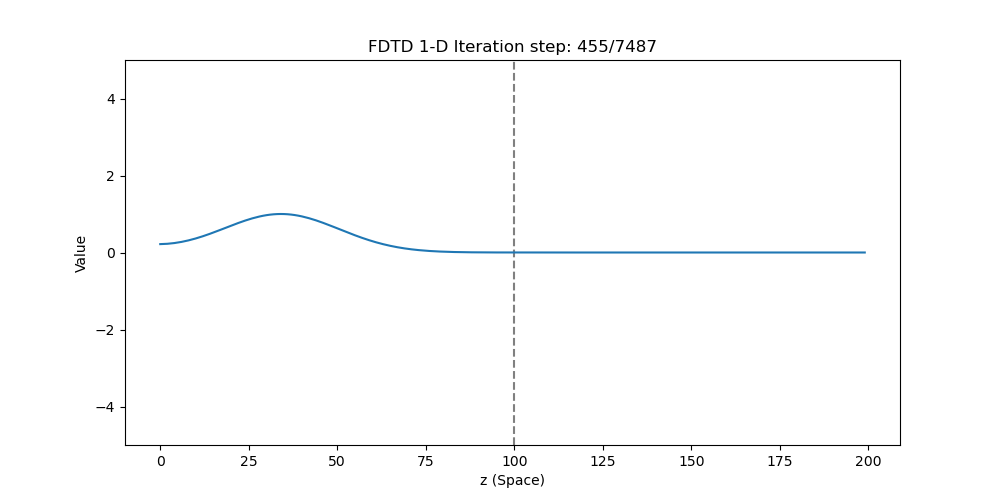

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

KeyboardInterrupt: 

In [7]:
%matplotlib notebook
fig = plt.figure(1,[10,5])
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,iteration):
    lineE = E_plot[i,:]
    #lineH = H_norm_plot[i,:]
    ax.clear()
    #plt.legend(handles = [lineE,lineH],labels=["Electric Field","Magnetic Field"])
    plt.ylabel('Value')
    plt.axvline(x=injection_point, color = "grey", linestyle="--")
    plt.ylim(-5,5)
    plt.xlabel('z (Space)')
    #plt.ylimit([-3,3])/
    plt.title(f'FDTD 1-D Iteration step: {i}/{iteration}')
    ax.plot(lineE)
    #ax.plot(lineH)
    fig.canvas.draw()
    #plt.savefig(f"1d-fdtd{i}.jpeg")
    ax = plt.axes()
    


In [ ]:
import numpy as np
from math import exp
from matplotlib import pyplot as plt
ke = 200
ex = np.zeros(ke)
hy = np.zeros(ke)
# Pulse parameters
kc = int(ke / 2)
t0 = 40
spread = 12
boundary_low = [0, 0]
boundary_high = [0, 0]
nsteps = 250
# Dictionary to keep track of desired points for plotting
plotting_points = [{'num_steps': 100, 'data_to_plot': None, 'label': ''},
                   {'num_steps': 225, 'data_to_plot': None, 'label': ''},
                   {'num_steps': 250, 'data_to_plot': None, 'label': 'FDTD cells'}]
# Main FDTD Loop
for time_step in range(1, nsteps + 1):
    # Calculate the Ex field
    for k in range(1, ke):
        ex[k] = ex[k] + 0.5 * (hy[k - 1] - hy[k])
    # Put a Gaussian pulse in the middle
    pulse = exp(-0.5 * ((t0 - time_step) / spread) ** 2)
    ex[kc] = pulse
    # Absorbing Boundary Conditions
    ex[0] = boundary_low.pop(0)
    boundary_low.append(ex[1])
    ex[ke - 1] = boundary_high.pop(0)
    boundary_high.append(ex[ke - 2])
    # Calculate the Hy field
    for k in range(ke - 1):
        hy[k] = hy[k] + 0.5 * (ex[k] - ex[k + 1])
            
    # Save data at certain points for later plotting
    for plotting_point in plotting_points:
        if time_step == plotting_point['num_steps']:
            plotting_point['data_to_plot'] = np.copy(ex)
            
# Plot the outputs as shown in Fig. 1.3
plt.rcParams['font.size'] = 12
fig = plt.figure(figsize=(8, 5.25))
def plot_e_field(data, timestep, label):
    """Plot of E field at a single time step"""
    plt.plot(data, color='k', linewidth=1)
    plt.ylabel('E$_x$', fontsize='14')
    plt.xticks(np.arange(0, 199, step=20))
    plt.xlim(0, 199)
    plt.yticks(np.arange(0, 1.2, step=1))
    plt.ylim(-0.2, 1.2)
    plt.text(100, 0.5, 'T = {}'.format(timestep),horizontalalignment='center')
    plt.xlabel('{}'.format(label))
    # Plot the E field at each of the time steps saved earlier
    for subplot_num, plotting_point in enumerate(plotting_points):
        ax = fig.add_subplot(3, 1, subplot_num + 1)
        plot_e_field(plotting_point['data_to_plot'],
                     plotting_point['num_steps'],
                     plotting_point['label'])
    plt.tight_layout()
    #plt.show()
    